In [1]:
from main import *
from utils import load_session
from preprocess import resize_and_pad

In [2]:
class CFG:
    image_size = IMAGE_SIZE
    conf_thres = 0.005
    iou_thres = 0.1

cfg = CFG()

In [3]:
session = load_session(PATH_MODEL)

In [4]:
session.get_providers()

['CPUExecutionProvider']

In [5]:
from PIL import Image, ImageDraw


In [13]:
image_cv = cv2.imread("sample/1.jpg")
print(image_cv.shape)

(333, 500, 3)


In [12]:
image, ratio, (padd_left, padd_top) = resize_and_pad(image_cv, new_shape=cfg.image_size) #(448,448)
img_norm = normalization_input(image)
print(img_norm.shape)


(1, 3, 448, 448)


In [11]:
pred = infer(session, img_norm)
print(pred.size)
pred = postprocess(pred)[0]
print(pred.size)


123480
120


In [14]:
paddings = np.array([padd_left, padd_top, padd_left, padd_top])
pred[:,:4] = (pred[:,:4] - paddings) / ratio

(500, 333)
120


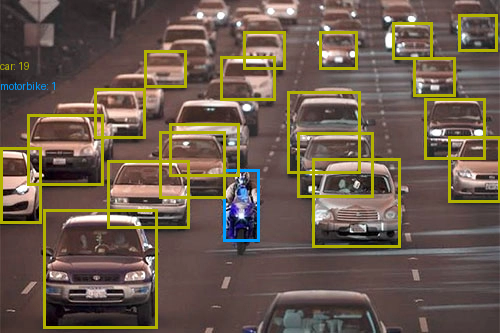

In [18]:
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image_cv)
print(image.size)
print(pred.size)
visualize(image, pred)

In [ ]:
print(pred.shape)

(20, 6)
